### **Autores**

*   Joan Caballero
*   Jeremy Comino
*   Marc Gonzalez
*   Gerard Farré

In [1]:
#!pip install pandas
#!pip install sklearn
#!pip install numpy
#!pip install matplotlib
#!pip install apafib --upgrade --user --quiet

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# **Predicción del uso de bicicletas**

## **Apartado A: Preproceso y preparación de los datos**

### Descripción superficial de los datos

A continuación leeremos los datos de la tabla Day debido a que nos interesan los datos a diarios y no los datos hora a hora

In [3]:
import pandas as pd

day = pd.read_csv("day.csv")

day.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
instant,731.0,NaN,NaN,NaN,366.0,211.165812,1.0,183.5,366.0,548.5,731.0
dteday,731,731,2011-01-01,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
season,731.0,NaN,NaN,NaN,2.49658,1.110807,1.0,2.0,3.0,3.0,4.0
yr,731.0,NaN,NaN,NaN,0.500684,0.500342,0.0,0.0,1.0,1.0,1.0
mnth,731.0,NaN,NaN,NaN,6.519836,3.451913,1.0,4.0,7.0,10.0,12.0
holiday,731.0,NaN,NaN,NaN,0.028728,0.167155,0.0,0.0,0.0,0.0,1.0
weekday,731.0,NaN,NaN,NaN,2.997264,2.004787,0.0,1.0,3.0,5.0,6.0
workingday,731.0,NaN,NaN,NaN,0.683995,0.465233,0.0,0.0,1.0,1.0,1.0
weathersit,731.0,NaN,NaN,NaN,1.395349,0.544894,1.0,1.0,1.0,2.0,3.0
temp,731.0,NaN,NaN,NaN,0.495385,0.183051,0.05913,0.337083,0.498333,0.655417,0.861667


A primera vista podemos ver que gran parte de los datos no están completos. Esto hace que no podamos saber todas las características de los datos a primera pero podemos hacer una evaluación parcial.

Antes de todo ya podemos ver, que hay una serie de variables (instant, dteday) que no nos aportan nada al modelo de regresión. Concretamente es una variable de indice y una variable que muestra la fecha. Por lo tanto, las descartaremos.

In [4]:
day = day.drop(['instant', 'dteday'], axis = 1)


A su vez para tratar de mejor manera los datos moveremos la variable objetivo a la primera columna.

In [5]:
columns_day = list(day.columns)

columns_day.remove('cnt')

columns_day.insert(0, 'cnt')

day = day.reindex(columns=columns_day)

day.head(5)

,cnt,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered
0,985,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654
1,801,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670
2,1349,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229
3,1562,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454
4,1600,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518


### Descripción individual de los datos.
A continuación haremos una breve inspección de los datos. Sobretodo queremos ver como són los datos en el tema de distribución (principalmente si sigue una distribución gaussiana).

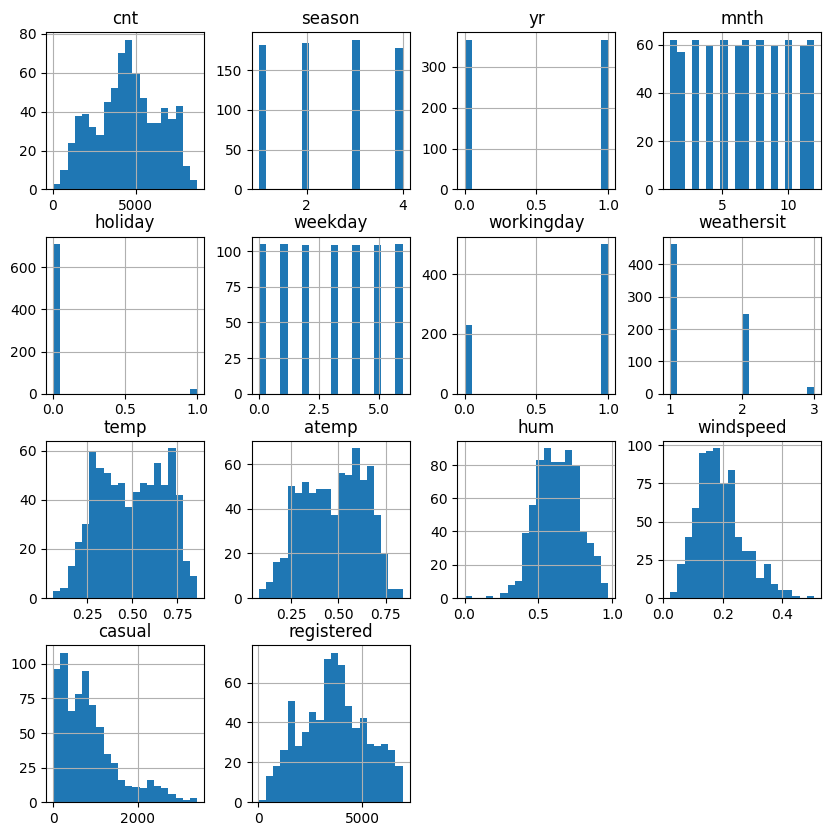

In [6]:
day.loc[:,:].hist(bins=20, figsize=(10,10));

A primeras podemos ver, que tenemos 7 variables categorías (debido a que los valores se concentran en ciertos numeros). Por el resto de variables podemos, observar que la variable objetivo es una superposición de 3 gaussianas, *casualidad* y *atemp* se parecen mucho a 2 gaussianas superpuestas.
*Hum* si que puede parecer una variable normal y *windspeed* se es muy similar una distribución de poisson.
Por último, la variable *Casual* tiene forma de hiperbola y la variable *Registered* Puede ser una variable gaussiana.

Para confirmar nuestras suposiciones sobre las normalidades de los datos, haremos un test de normalidad.

In [7]:
from scipy.stats import normaltest
# Hacemos test con un 95% confianza
tanto_por_1_confianza = 0.95
p_v = 1-tanto_por_1_confianza
columns = list(day.columns)
_ = columns.pop(0)
for column in columns:
    res = normaltest(day[column], nan_policy = "omit")
    # si e p_value es menor al p_v significa que rechazamos la hipotesi nula y por lo tanto no sigue una distribución gaussiana
    if(res.pvalue <= p_v):
        print(column + " no tiene una distribución normal")
    else:
        print(column + " tiene una distribución normal")

season no tiene una distribución normal
yr no tiene una distribución normal
mnth no tiene una distribución normal
holiday no tiene una distribución normal
weekday no tiene una distribución normal
workingday no tiene una distribución normal
weathersit no tiene una distribución normal
temp no tiene una distribución normal
atemp no tiene una distribución normal
hum tiene una distribución normal
windspeed no tiene una distribución normal
casual no tiene una distribución normal
registered no tiene una distribución normal


Como podemos observar únicamente la variable *hum* llega ser a tener una distribución normal.

A continuación, vamos a ver las posibles relaciones que hay entre variables.
Para esto, utilizaremso las correlaciones. Esto nos ayudará a dar un inicio en todo el proceso de eliminación de variables.

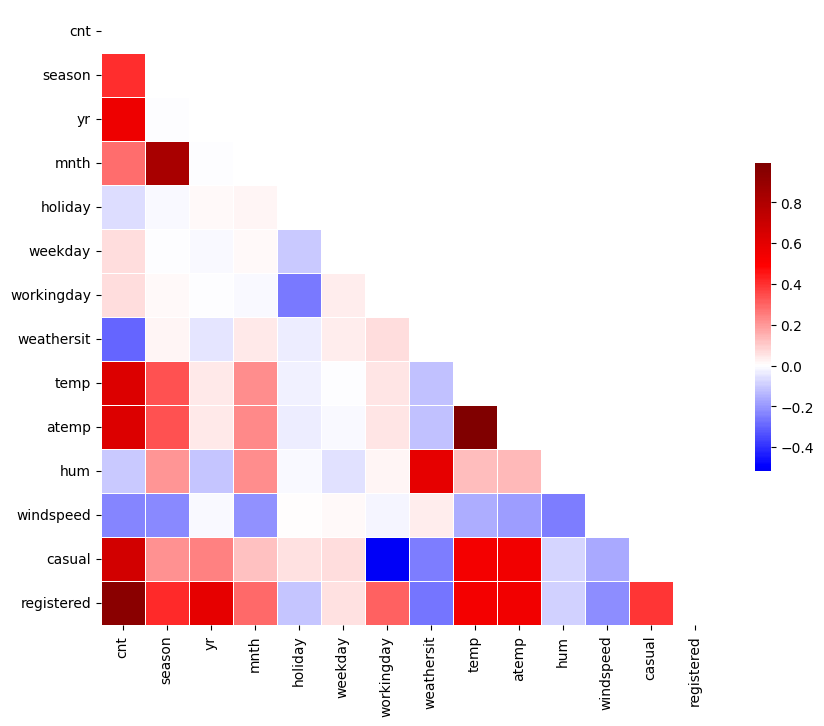

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

corr = day.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.subplots(figsize=(10, 8))
sns.heatmap(corr, mask=mask, cmap='seismic',  center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5});

Viendo las correlaciones podemos llegar a extraer las siguientes conclusiones:
* las variables *casual* y *registered* están altamente correlacionadas con la variable respuesta. Esto puede llegar a dar problemas de sobre-entrenamiento en el modelo ya que se fijaría la regresión principalmente en estas variables. Por lo tanto, las eliminaremos.
* Season está correlacionado con month, por lo tanto debido a que podemos explicar la estación del año con los meses, eliminaremos esta variable.
* La variables de temperatura *temp* y *atemp* están altamente correlacionadas. Entonces, debido a que nosotros pensamos que es la decisión de coger una bicicleta se basa más en la temperatura ambiente que nosotros llegamos a percibir y no la temperatura. Hemos decidido mantener la variable *atemp* y eliminar *temp*.


In [9]:
#day = day.drop(['temp', 'holiday', 'season', 'casual', 'registered','yr'], axis=1)
day = day.drop(['temp','casual', 'registered','season'], axis=1)

In [10]:
dummies1 = pd.get_dummies(day['mnth'], drop_first=True, prefix='mnth', prefix_sep='_') * 1
dummies2 = pd.get_dummies(day['weekday'], drop_first=True, prefix='weekday', prefix_sep='_') * 1
dummies3 = pd.get_dummies(day['workingday'], drop_first=True, prefix='workingday', prefix_sep='_') * 1
dummies4 = pd.get_dummies(day['weathersit'], drop_first=True, prefix='weathersit', prefix_sep='_') * 1
#dummies5 = pd.get_dummies(day['season'], drop_first=True, prefix='season', prefix_sep='_') * 1

day = pd.concat([day,dummies1, dummies2, dummies3, dummies4], axis=1)
day.drop(columns=['mnth', 'weekday', 'workingday', 'weathersit'], inplace=True)

### División de datos
Dividimos los datos en conjuntos de entrenamiento y test (60% / 40%).

In [11]:
from sklearn.model_selection import train_test_split

day_train, day_test = train_test_split(day, test_size=0.4, random_state=0)

X_train = day_train.drop("cnt", axis=1)
y_train = day_train["cnt"]

X_test = day_test.drop("cnt", axis=1)
y_test = day_test["cnt"]


X_train.shape, X_test.shape

((438, 25), (293, 25))

### Valores extremos
A continuación seleccionaremos las variables númericas y miraremos cuáles tienen valores extremos.

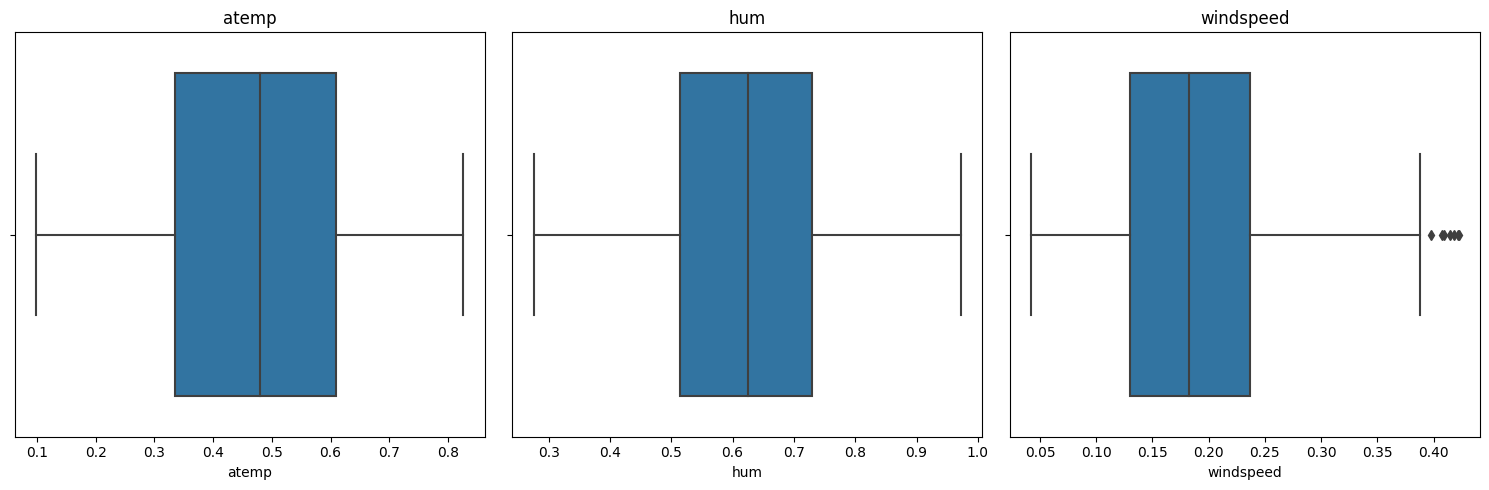

In [12]:
fig, axes = plt.subplots(1,3,figsize=(15,5))

for i, col_name in enumerate(["atemp", "hum", "windspeed"]):
    ax = axes.reshape(-1)[i]
    histplot = sns.boxplot(x=col_name,data=X_train,ax=ax)
    title = ax.set_title(col_name)
plt.tight_layout()

Hemos detectado que hay valores extremos en la variable *windspeed*, así que vamos a verlo con más detalle.

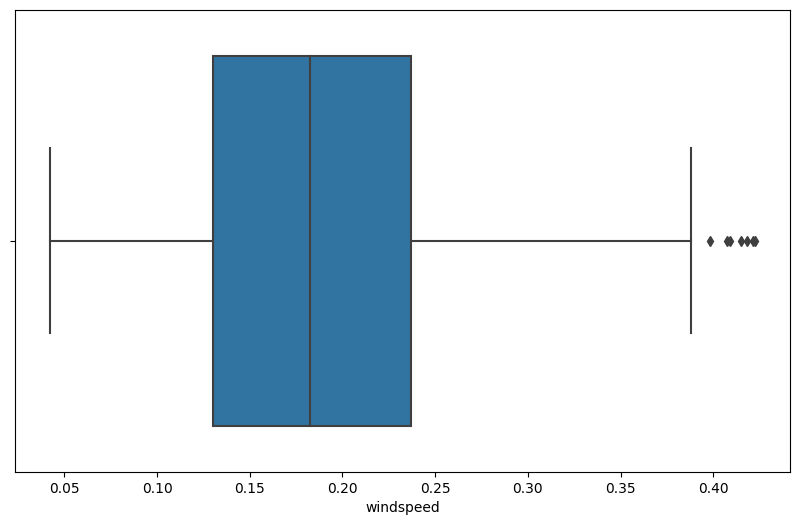

In [13]:
plt.figure(figsize=(10,6));
sns.boxplot(data=X_train, x="windspeed");

Vamos a detectar si la variable *windspeed* sigue una distribución normal para escoger qué estudio de outliers aplicarle.

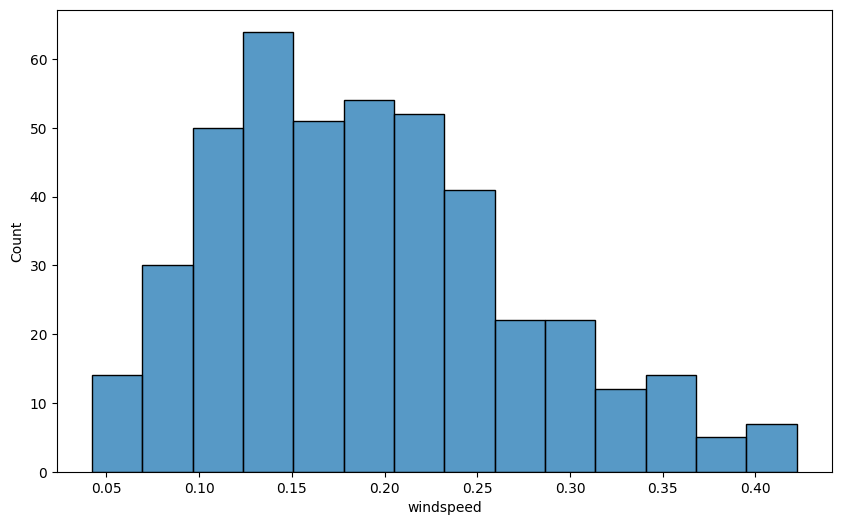

In [14]:
plt.figure(figsize=(10,6));
sns.histplot(data=X_train, x="windspeed");

Como vemos en el histograma anterior y en el estudio de normalidad que hicimos previamente, esta variable no sigue una distribución normal. Por tanto, vamos a realizarle un estudio de outliers con LocalOutlierFactor.

In [15]:
from sklearn.neighbors import LocalOutlierFactor

local_outlier_factor = LocalOutlierFactor(n_neighbors=20)
result = local_outlier_factor.fit_predict(X_train.values)

outliers = result == -1
no_outliers = result == 1

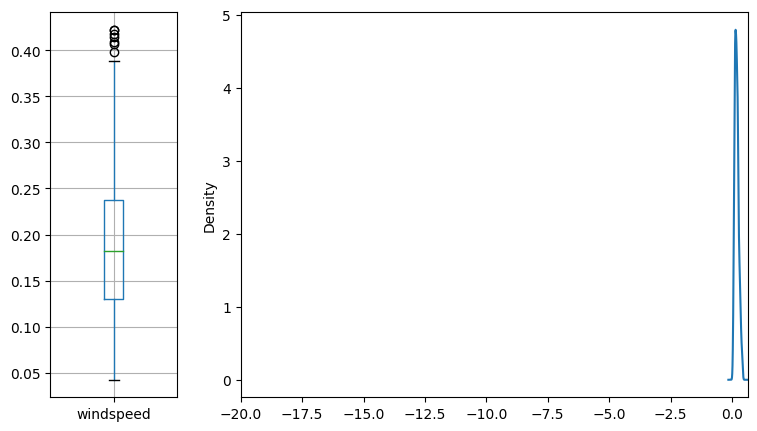

In [16]:
fig, axes = plt.subplots(1,2, gridspec_kw={'width_ratios': [1, 4]}, figsize=(9,5))
X_train[no_outliers].boxplot(column='windspeed',ax=axes[0]);
X_train[no_outliers]['windspeed'].plot.kde().set_xlim(left=-20);

Hemos detectado unos pocos outliers en la variable *windspeed*. Por lo tanto, hemos decidido de mantenerlos en nuestro dataset y más adelante si vemos que pueden dar problemas en los modelos de regresión eliminarlos.

### Normalización

Seguidamente, normalizaremos nuestros datos para que tengan una media de 0 y una desviación estándard de 1, con el objetivo de poderle aplicar más tarde el PCA.

(-2.0, 4.8815640431818865)

(-2.0, 4.8815640431818865)

(-2.0, 4.8815640431818865)

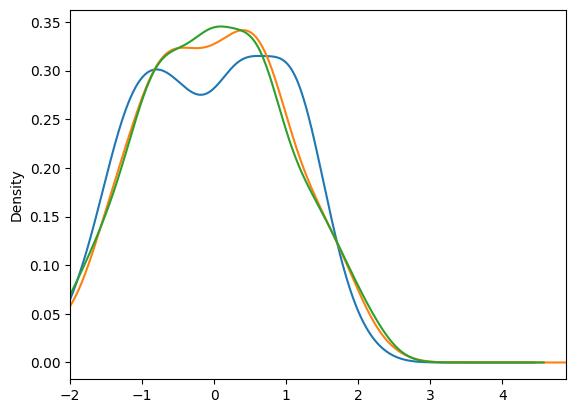

In [17]:
from sklearn.preprocessing import PowerTransformer

yj_power = PowerTransformer(method='yeo-johnson')

# atemp
X_train['atemp_yj'] = yj_power.fit_transform(day_train['atemp'].values.reshape(-1, 1))
X_train['atemp_yj'].plot.kde().set_xlim(left=-2);
X_test['atemp_yj'] = yj_power.fit_transform(day_test['atemp'].values.reshape(-1, 1))

# hum
X_train['hum_yj'] = yj_power.fit_transform(day_train['hum'].values.reshape(-1, 1))
X_train['hum_yj'].plot.kde().set_xlim(left=-2);
X_test['hum_yj'] = yj_power.fit_transform(day_test['hum'].values.reshape(-1, 1))

# windspeed
X_train['windspeed_yj'] = yj_power.fit_transform(day_train['windspeed'].values.reshape(-1, 1))
X_train['windspeed_yj'].plot.kde().set_xlim(left=-2);
X_test['windspeed_yj'] = yj_power.fit_transform(day_test['windspeed'].values.reshape(-1, 1))

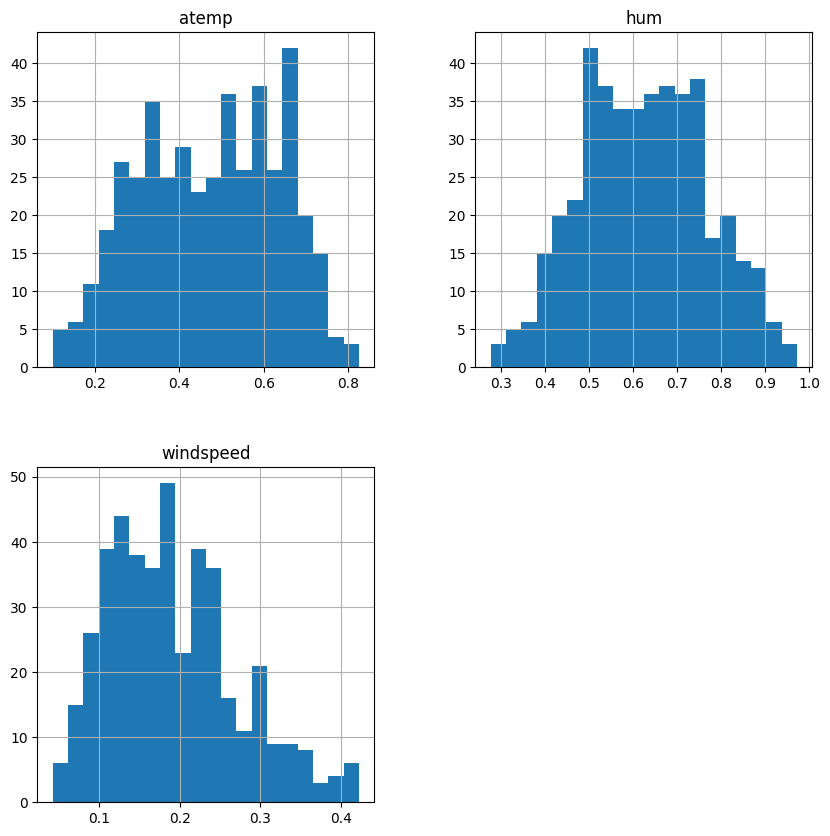

In [18]:
X_train.loc[:,["atemp", "hum", "windspeed"]].hist(bins=20, figsize=(10,10));

In [19]:
X_train.drop(columns=['atemp'], inplace=True)
X_train.drop(columns=['hum'], inplace=True)
X_train.drop(columns=['windspeed'], inplace=True)

X_test.drop(columns=['atemp'], inplace=True)
X_test.drop(columns=['hum'], inplace=True)
X_test.drop(columns=['windspeed'], inplace=True)

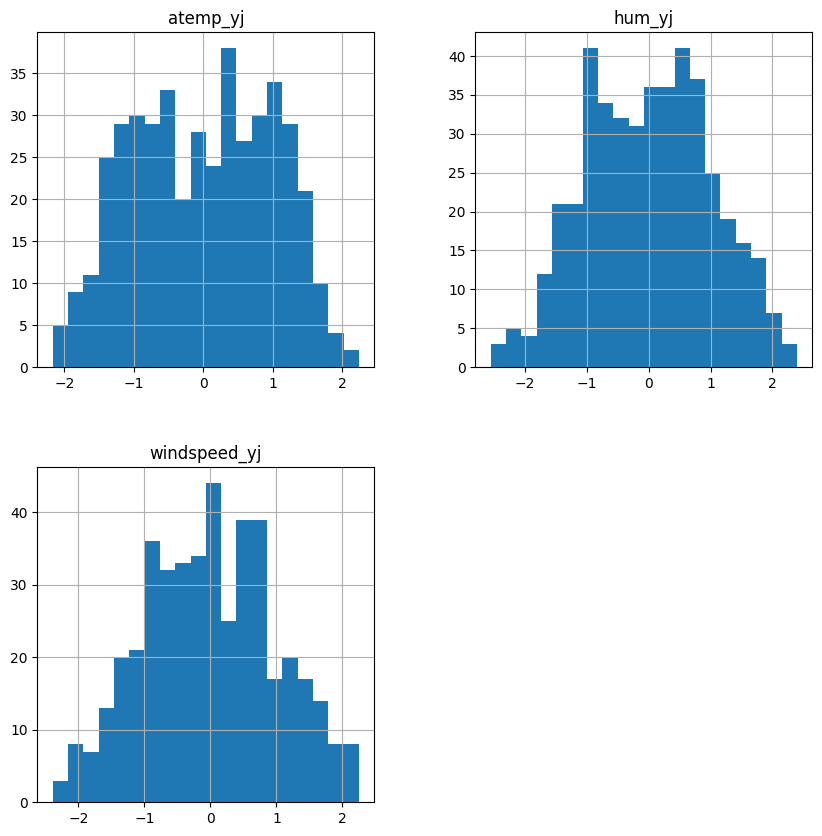

In [20]:
X_train.loc[:,["atemp_yj", "hum_yj", "windspeed_yj"]].hist(bins=20, figsize=(10,10));

In [21]:
X_train.head()

,yr,holiday,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,...,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weathersit_2,weathersit_3,atemp_yj,hum_yj,windspeed_yj
107,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0.172134,-0.581153,-0.246875
133,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0.156689,2.062806,-0.672902
418,1,0,1,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,-0.185348,-0.494228,0.123308
223,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,1,0,0,1.116542,-1.511481,-0.821156
549,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,1.428315,-0.946120,-0.811217


In [22]:
X_train.describe()

,yr,holiday,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,...,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weathersit_2,weathersit_3,atemp_yj,hum_yj,windspeed_yj
count,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,...,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,4.380000e+02,4.380000e+02,4.380000e+02
mean,0.504566,0.029680,0.073059,0.091324,0.086758,0.086758,0.084475,0.075342,0.082192,0.082192,...,0.143836,0.132420,0.139269,0.143836,0.691781,0.347032,0.027397,2.514478e-16,3.391503e-16,-1.216683e-16
std,0.500551,0.169898,0.260531,0.288399,0.281802,0.281802,0.278417,0.264245,0.274971,0.274971,...,0.351324,0.339335,0.346623,0.351324,0.462286,0.476570,0.163425,1.001144e+00,1.001144e+00,1.001144e+00
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.168370e+00,-2.556645e+00,-2.390615e+00
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-8.321254e-01,-7.873145e-01,-7.488314e-01
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,3.298978e-02,8.330319e-03,1.336807e-02
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,8.303496e-01,7.419460e-01,6.756265e-01
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.237839e+00,2.398253e+00,2.251129e+00


## **Apartado B: PCA**

Ahora tenemos 24 atributos distintos, podemos aplicar PCA para generar 24 nuevas componentes y ver si alguna es prescindible.

In [23]:
from sklearn.decomposition import PCA
myPCA = PCA().fit(X_train);
myPCA_test = PCA().fit(X_test);

print(myPCA.explained_variance_ratio_)
print(myPCA.explained_variance_ratio_.cumsum())

[2.69518968e-01 1.72080884e-01 1.51255800e-01 5.91504132e-02
 4.74764965e-02 3.16575075e-02 2.89141343e-02 2.76120331e-02
 2.61501436e-02 2.50167720e-02 1.67418081e-02 1.61760450e-02
 1.58863068e-02 1.55923524e-02 1.52700668e-02 1.50042166e-02
 1.47920119e-02 1.44107536e-02 1.26197509e-02 1.05765013e-02
 5.88201069e-03 4.44676465e-03 3.22020602e-03 5.48052605e-04
 3.24270530e-33]
[0.26951897 0.44159985 0.59285565 0.65200607 0.69948256 0.73114007
 0.7600542  0.78766624 0.81381638 0.83883315 0.85557496 0.87175101
 0.88763731 0.90322967 0.91849973 0.93350395 0.94829596 0.96270671
 0.97532646 0.98590297 0.99178498 0.99623174 0.99945195 1.
 1.        ]


En las siguientes gráficas podemos observar que la varianza se acumula principalmente en las primeras componentes. Por lo tanto, con el objetivo de reducir la dimensionalidad podemos eliminar las últimas 15 componentes y quedarnos con las primeras 9 (que representan un 81% de la varianza)

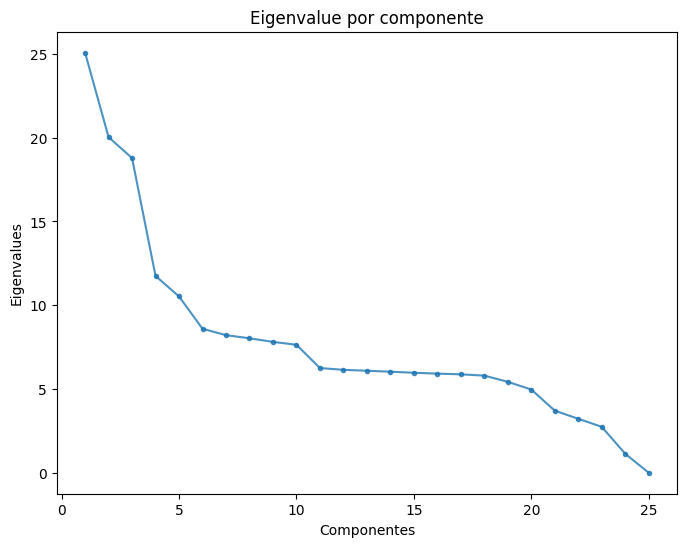

In [24]:
fig = plt.figure(figsize=(8,6));
plt.plot(range(1,len(myPCA.singular_values_ )+1),myPCA.singular_values_ ,alpha=0.8,marker='.');
y_label = plt.ylabel('Eigenvalues');
x_label = plt.xlabel('Componentes');
plt.title('Eigenvalue por componente');

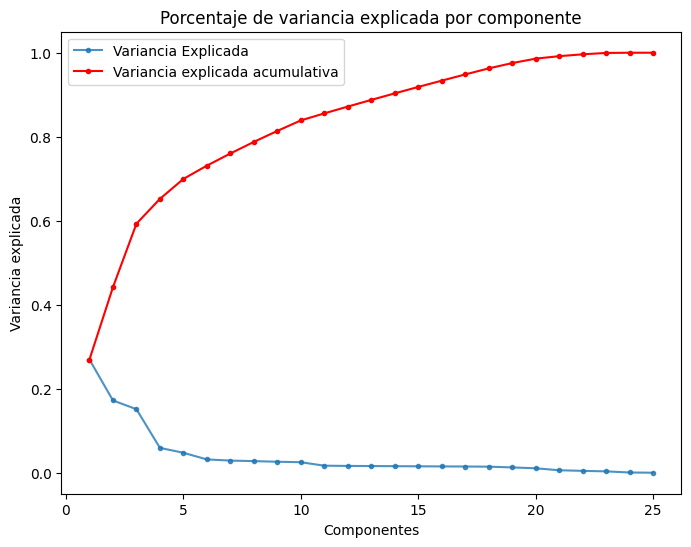

In [25]:
fig = plt.figure(figsize=(8,6));
plt.plot(range(1,len(myPCA.explained_variance_ratio_ )+1),myPCA.explained_variance_ratio_ ,alpha=0.8,marker='.',label="Variancia Explicada");
y_label = plt.ylabel('Variancia explicada');
x_label = plt.xlabel('Componentes');
plt.plot(range(1,len(myPCA.explained_variance_ratio_ )+1),
         np.cumsum(myPCA.explained_variance_ratio_),
         c='red',marker='.',
         label="Variancia explicada acumulativa");
plt.legend();
plt.title('Porcentaje de variancia explicada por componente');

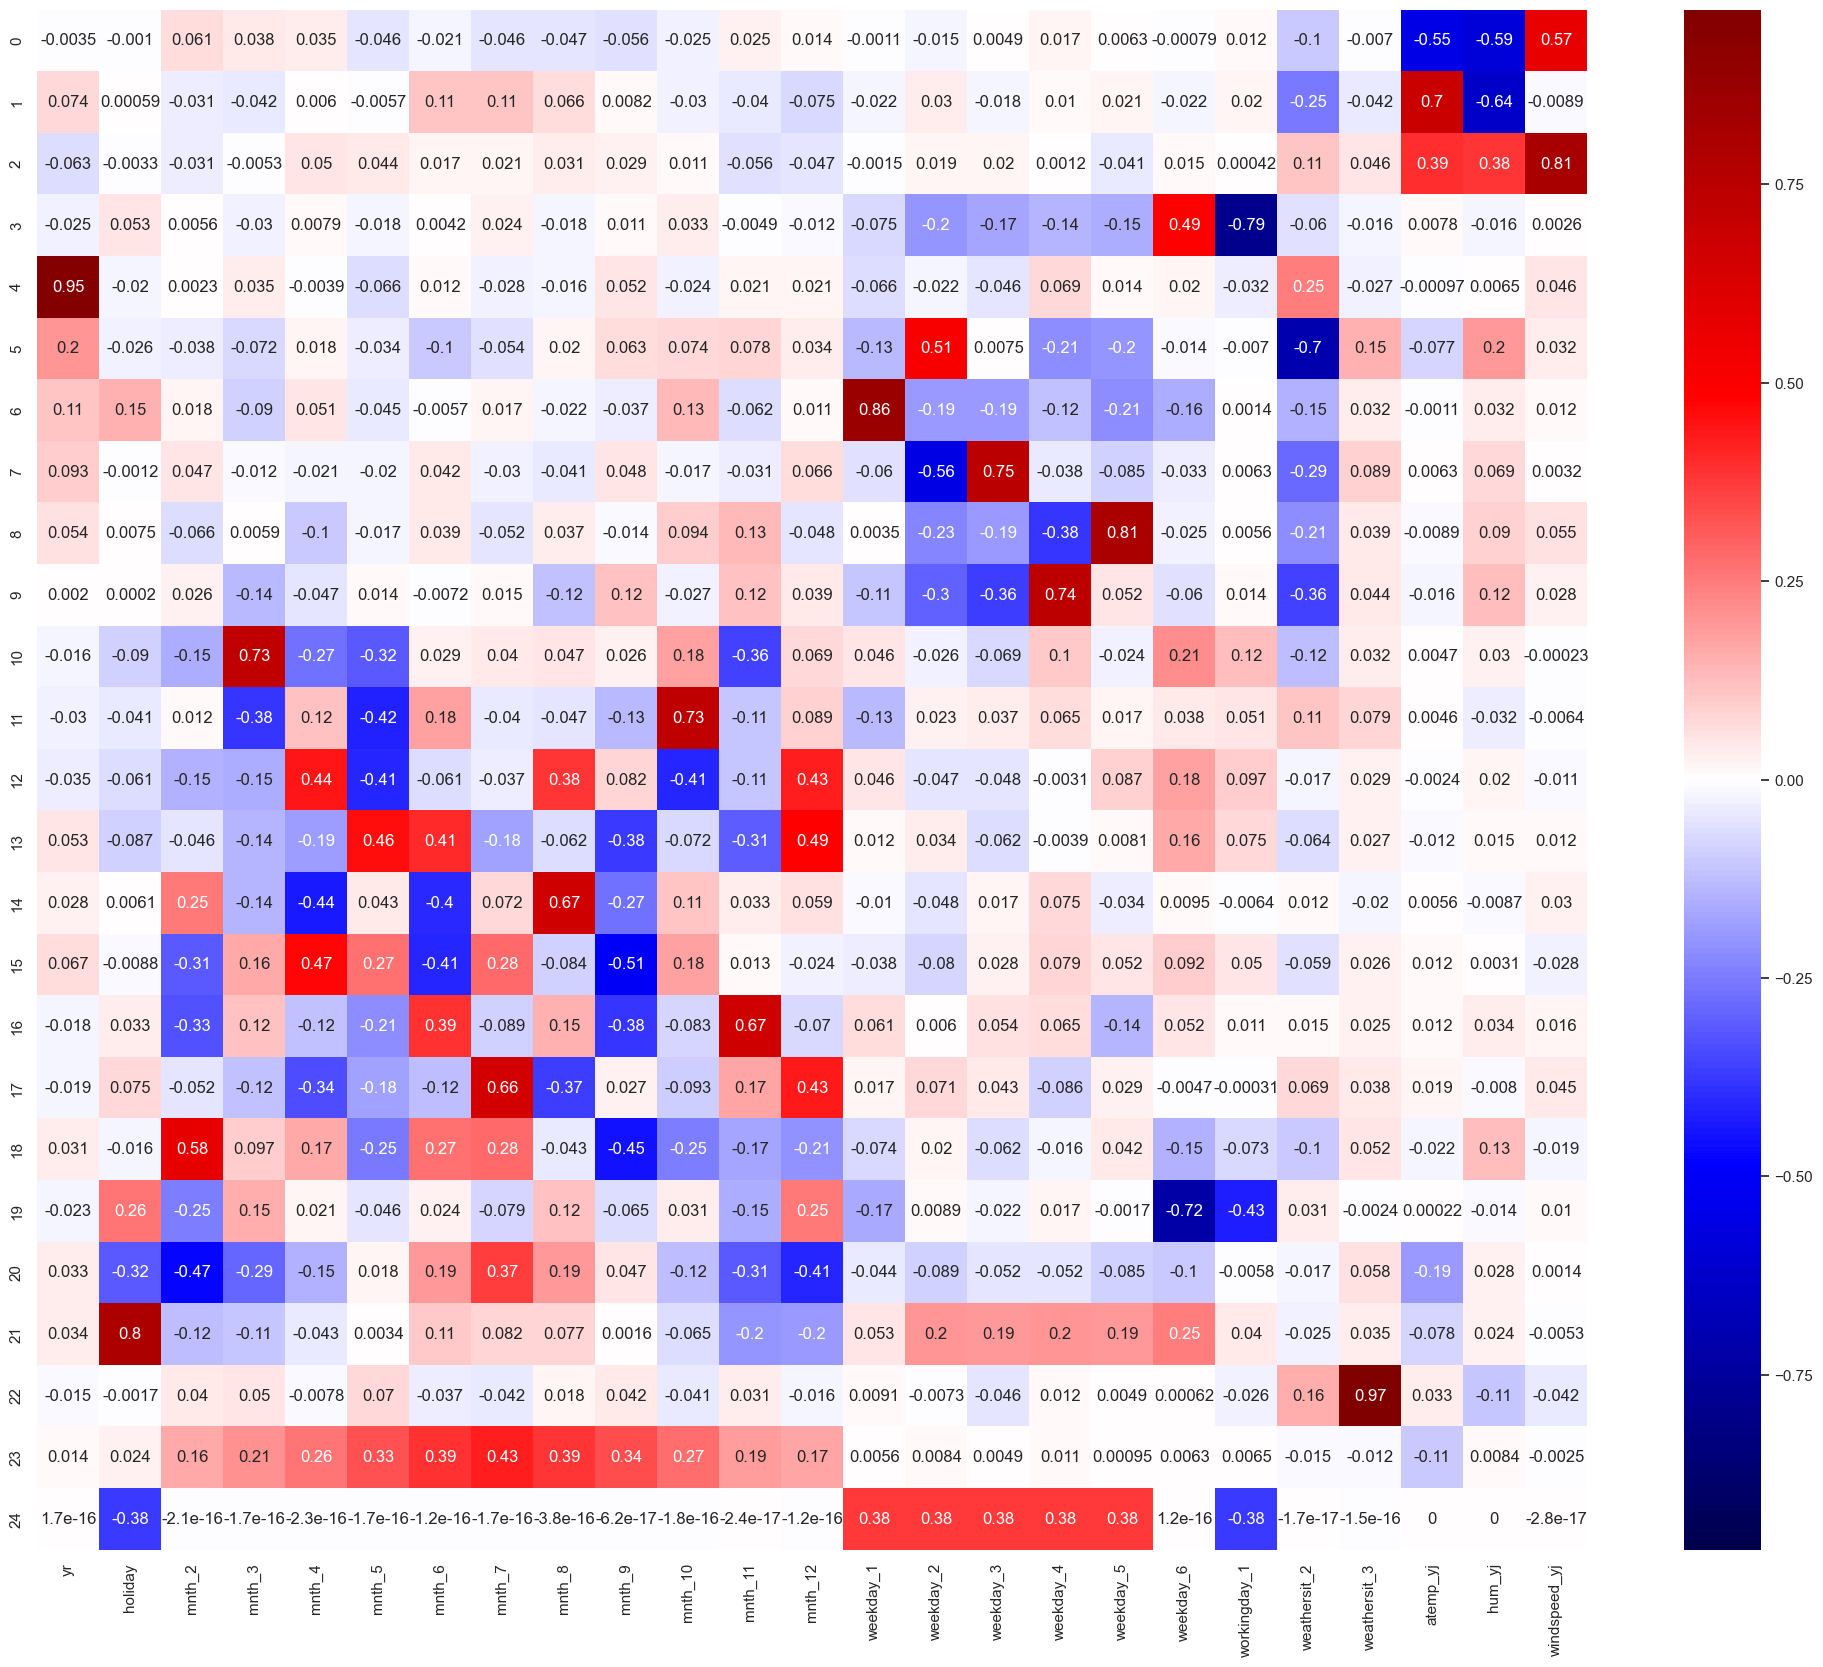

In [26]:
sns.set(rc={'figure.figsize':(25,20)})
sns.heatmap(myPCA.components_, cmap='seismic',
            xticklabels=X_train.columns,
            vmin=-np.max(np.abs(myPCA.components_)),
            vmax=np.max(np.abs(myPCA.components_)),
            annot=True);

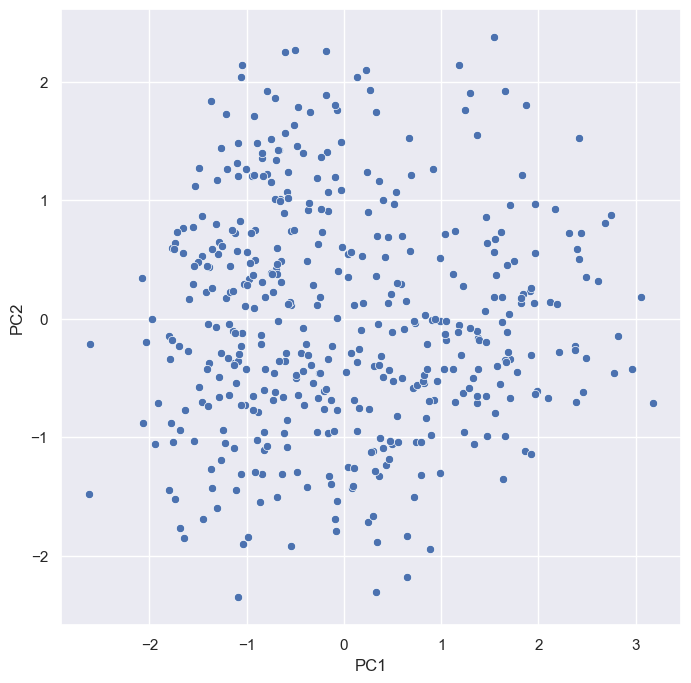

In [27]:
transformed_X_train = myPCA.transform(X_train)
_transformed_X_train = X_train.copy()
_transformed_X_train[['PC1','PC2', 'PC3']] = transformed_X_train[:,:3]
fig = plt.figure(figsize=(8,8))
_ = sns.scatterplot(x='PC1', y='PC2', data=_transformed_X_train)

Si comparamos la componente 1 y la 2 observamos que se distancian algo. Esto se ve más claramente si comparamos también con la PC3.

/home/jeremy/.local/lib/python3.8/site-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


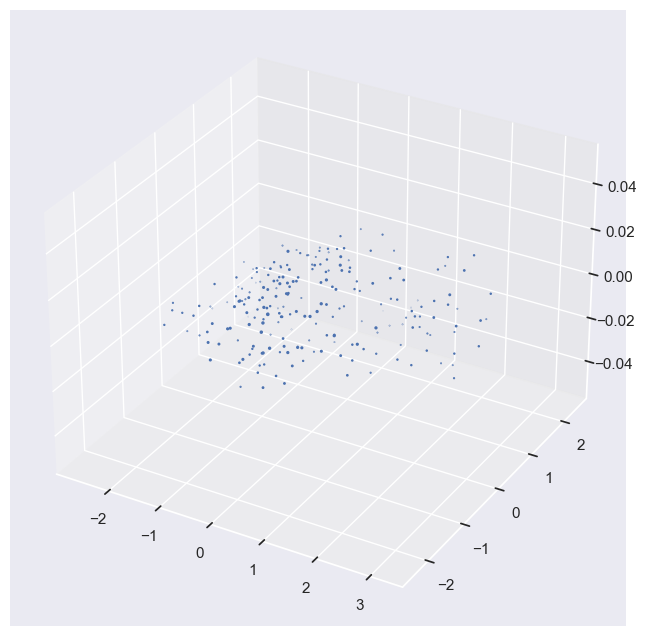

In [28]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(_transformed_X_train.PC1,
            _transformed_X_train.PC2,
            _transformed_X_train.PC3,
            depthshade=False)

## **Apartado C: Regresión Poisson**

A continuación haremos una regression de Poisson

/home/jeremy/.local/lib/python3.8/site-packages/sklearn/linear_model/_glm/glm.py:282: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)
/home/jeremy/.local/lib/python3.8/site-packages/sklearn/linear_model/_glm/glm.py:282: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)
/home/jeremy/.local/lib/python3.8/site-packages/sklearn/linear_model/_glm/glm.py:282: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_

GridSearchCV(cv=5, estimator=PoissonRegressor(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.5, 1, 5, 10, 50,
                                   100]})

El mejor valor de lambda es: 1


PoissonRegressor(alpha=1)

<Figure size 1200x800 with 0 Axes>

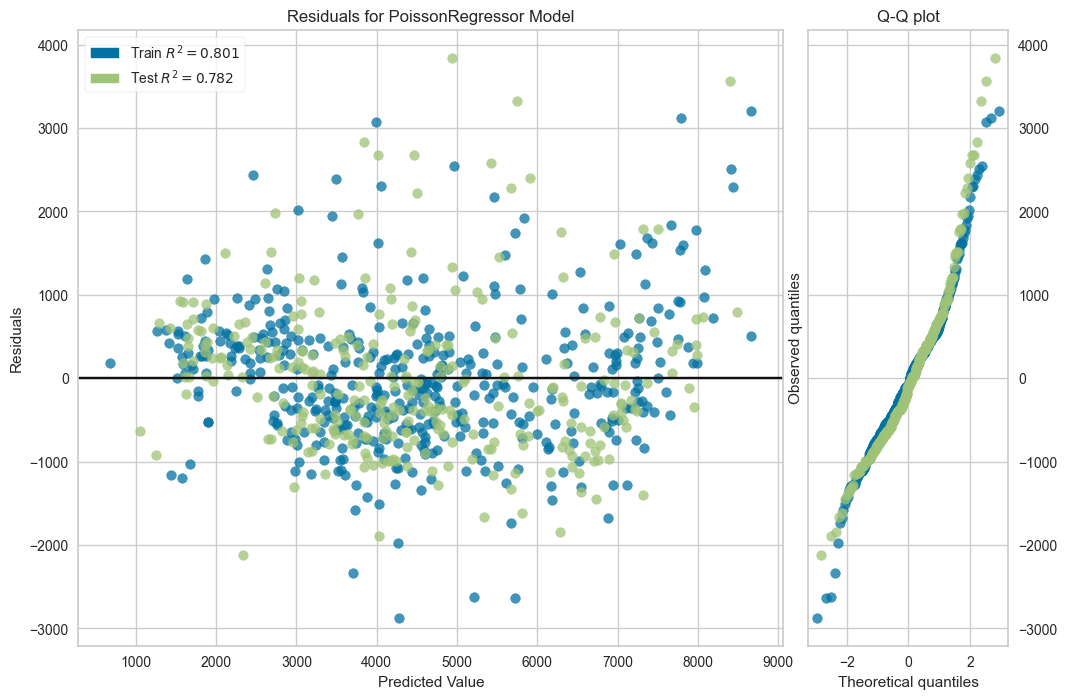

Mse tiene un valor de: 808523.7959026349


In [29]:
from sklearn.linear_model import PoissonRegressor
from sklearn.model_selection import GridSearchCV
lambdas = [1e-4,1e-3,1e-2,0.1, 0.5,1,5,10,50,100]

param_grid = {'alpha': lambdas}

model = PoissonRegressor()
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_alpha = grid_search.best_params_['alpha']

print(f"El mejor valor de lambda es: {best_alpha}")

model = PoissonRegressor(alpha=best_alpha)
model.fit(X_train, y_train)

from yellowbrick.regressor import residuals_plot
plt.figure(figsize=(12,8));
viz = residuals_plot(model, X_train, y_train, X_test, y_test, is_fitted=True, qqplot=True, hist=False);

from sklearn.metrics import mean_squared_error
y_pred_test = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred_test)

print(f"Mse tiene un valor de: {mse}")

Podemos observar que los residuos llegan a seguir una distribución normal. A su vez, los residuos podemos ver que se distribuyen de manera uniforme, dando a entender se ajustan a esta regresión.

## **Apartado D: Linear Regression**

Vamos a ajustar una regresión lineal a los datos y calcularemos la calidad del modelo empleando validación cruzada y con los datos de test.

Utilizaremos el modelo de scikit-klearn para la regresión lineal.

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

model_LR = LinearRegression()

folds_r2 = cross_val_score(model_LR, X_train, y_train, cv=5, scoring='r2')
lr_r2 = np.mean(folds_r2)
print(f"Los valores r2 de cada fold son: {folds_r2}")
print(f"La media de los valores r2 es: {lr_r2}")

model_LR.fit(X_train, y_train)

y_pred_test = model_LR.predict(X_test)
mse = mean_squared_error(y_test, y_pred_test)

print(f"Mse tiene un valor de: {mse}")

Los valores r2 de cada fold son: [0.82706362 0.80210095 0.80015989 0.79924703 0.78120331]
La media de los valores r2 es: 0.8019549589380347


LinearRegression()

Mse tiene un valor de: 769100.4784655914


Podemos obtener un gráfico de los residuos del entrenamiento y el test con el _qqplot_ o el _histograma_ con la librería `yellowbrick`.

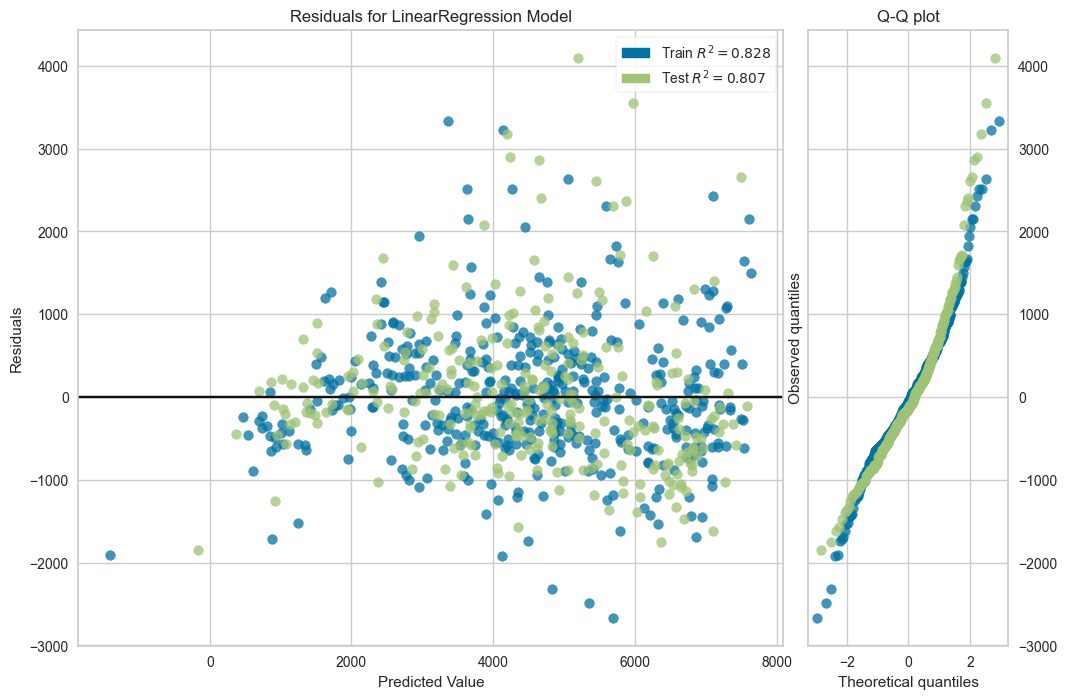

In [31]:
plt.figure(figsize=(12,8));
viz = residuals_plot(model_LR, X_train, y_train, X_test, y_test, is_fitted=True, qqplot=True, hist=False);

También podemos representar las predicciones respecto a los valores reales y ver cuanto se desvían de la predicción ideal.

<Figure size 800x800 with 0 Axes>

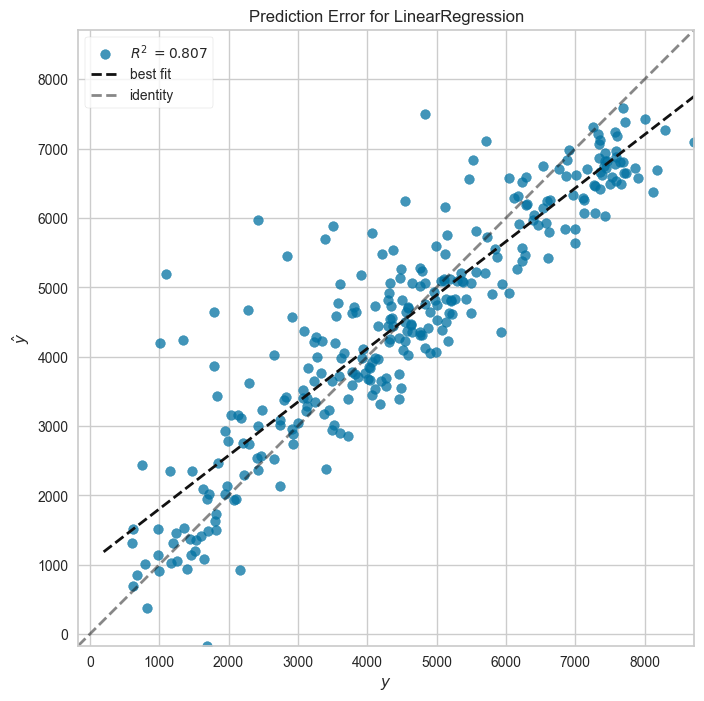

In [32]:
from yellowbrick.regressor import prediction_error

plt.figure(figsize=(8,8))
visualizer = prediction_error(model_LR, X_test, y_test, is_fitted=True)

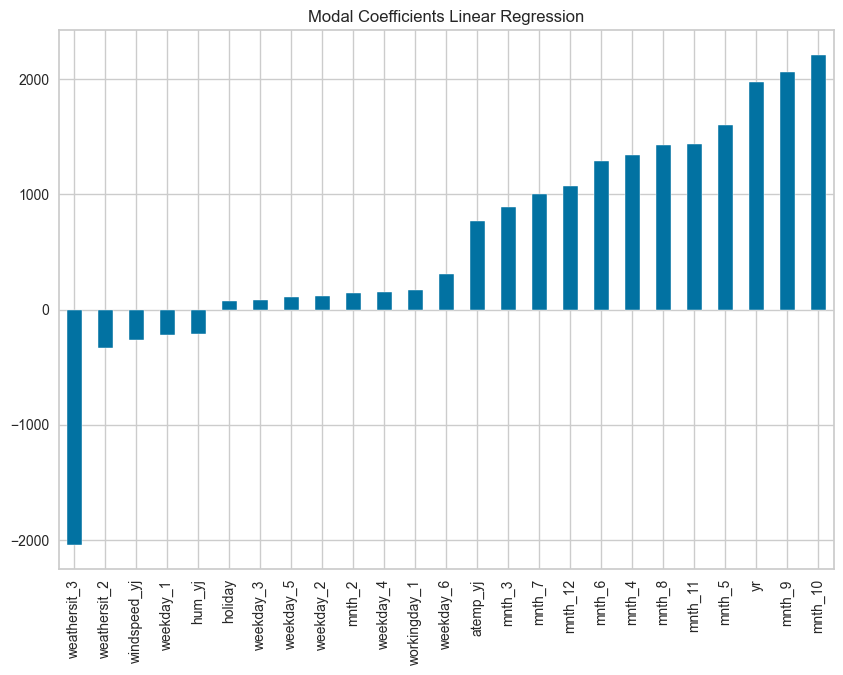

In [33]:
predictors = X_train.columns

coef = pd.Series(model_LR.coef_,predictors).sort_values()

plt.figure(figsize=(10, 7));
coef.plot(kind='bar', title='Modal Coefficients Linear Regression');

## **Apartado E: Regresión LASSO**

In [34]:
from sklearn.linear_model import LassoCV

model = LassoCV(alphas=lambdas,cv=5).fit(X_train,y_train)

lasso_r2 =  np.mean(cross_val_score(model, X_train,y_train))

print('Best lambda:', model.alpha_)
print('R2 score:', lasso_r2)

y_pred_test = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred_test)

print(f"Mse tiene un valor de: {mse}")

/home/jeremy/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.708e+06, tolerance: 1.288e+05
  model = cd_fast.enet_coordinate_descent(


Best lambda: 0.5
R2 score: 0.8011142346305936
Mse tiene un valor de: 770627.9845828431


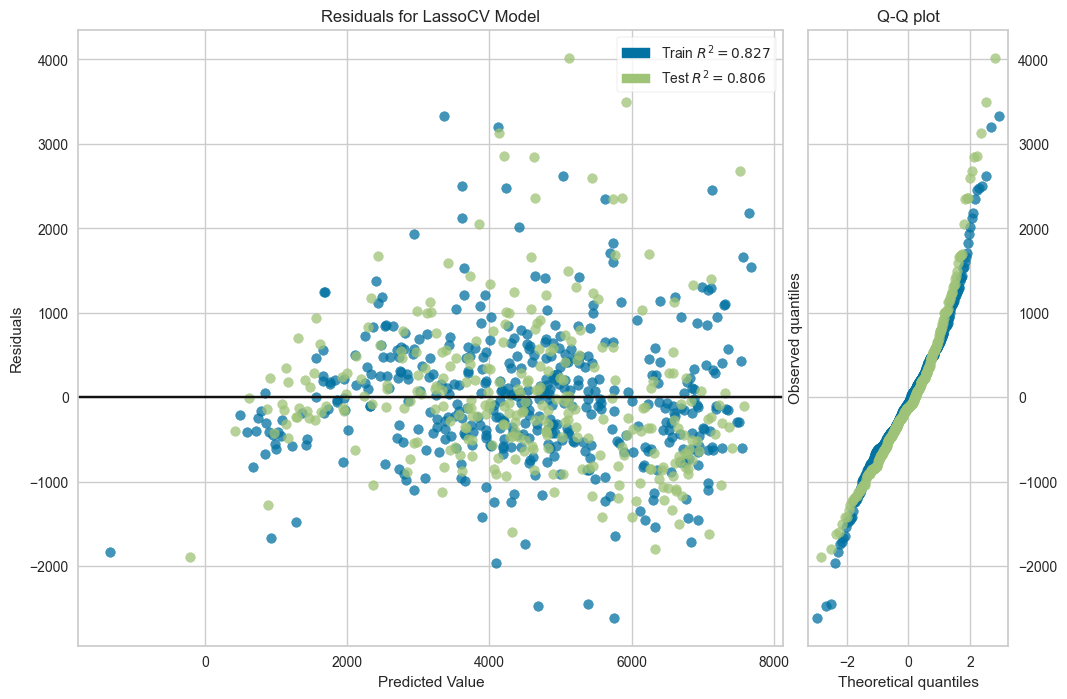

In [35]:
plt.figure(figsize=(12,8));
viz = residuals_plot(model, X_train, y_train, X_test, y_test, is_fitted=True, qqplot=True, hist=False);

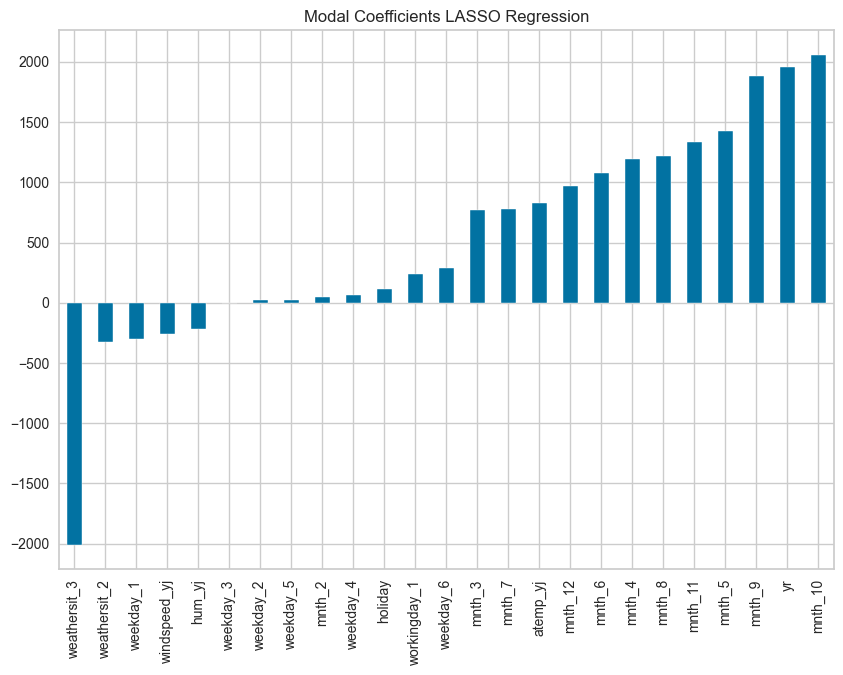

In [36]:
predictors = X_train.columns

coef = pd.Series(model.coef_,predictors).sort_values()

plt.figure(figsize=(10, 7));
coef.plot(kind='bar', title='Modal Coefficients LASSO Regression');

## Apartado Extra: Regresión sin la variable year

Debido a que no sabemos la importancia que tiene la variable year en la regresión, queremos hacer una prueba de qué estadísticos de calidad nos salen las regresiones sin esta variable.

In [37]:
X_train_no_year = X_train.copy()
X_train_no_year.drop("yr", axis=1, inplace=True)
X_test_no_year = X_test.copy()
X_test_no_year.drop("yr",axis=1, inplace=True)

/home/jeremy/.local/lib/python3.8/site-packages/sklearn/linear_model/_glm/glm.py:282: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)
/home/jeremy/.local/lib/python3.8/site-packages/sklearn/linear_model/_glm/glm.py:282: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)


GridSearchCV(cv=5, estimator=PoissonRegressor(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.5, 1, 5, 10, 50,
                                   100]})

El mejor valor de lambda es: 5


PoissonRegressor(alpha=5)

<Figure size 1200x800 with 0 Axes>

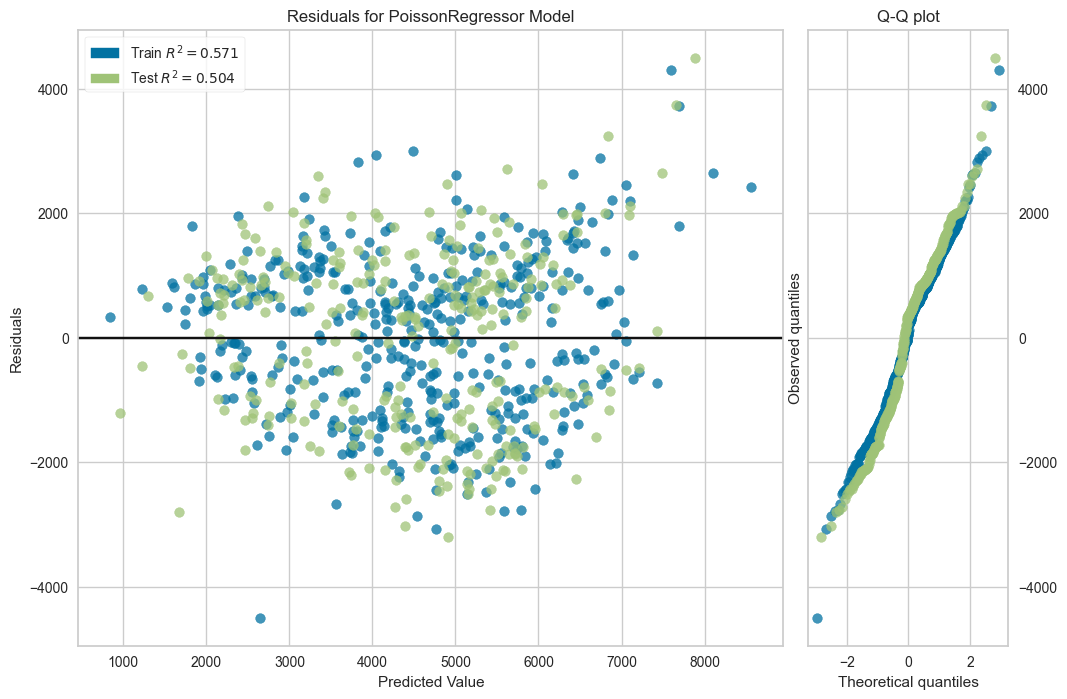

Mse tiene un valor de: 2043831.0581994802


In [38]:
lambdas = [1e-4,1e-3,1e-2,0.1, 0.5,1,5,10,50,100]

param_grid = {'alpha': lambdas}

model = PoissonRegressor()

grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train_no_year, y_train)
best_alpha = grid_search.best_params_['alpha']

print(f"El mejor valor de lambda es: {best_alpha}")

model = PoissonRegressor(alpha=best_alpha)
model.fit(X_train_no_year, y_train)
plt.figure(figsize=(12,8));
viz = residuals_plot(model, X_train_no_year, y_train, X_test_no_year, y_test, is_fitted=True, qqplot=True, hist=False);
y_pred_test = model.predict(X_test_no_year)
mse = mean_squared_error(y_test, y_pred_test)
print(f"Mse tiene un valor de: {mse}")

In [39]:
model = LinearRegression()

folds_r2 = cross_val_score(model, X_train_no_year,y_train, cv=5, scoring='r2')
lr_r2 = np.mean(folds_r2)
print(f"Los valores r2 de cada fold son: {folds_r2}")
print(f"La media de los valores r2 es: {lr_r2}")

model.fit(X_train_no_year, y_train)

y_pred_test = model.predict(X_test_no_year)
mse = mean_squared_error(y_test, y_pred_test)

print(f"Mse tiene un valor de: {mse}")

Los valores r2 de cada fold son: [0.57219889 0.59184012 0.52533282 0.44070193 0.49411489]
La media de los valores r2 es: 0.5248377302388529


LinearRegression()

Mse tiene un valor de: 1977824.3926601976


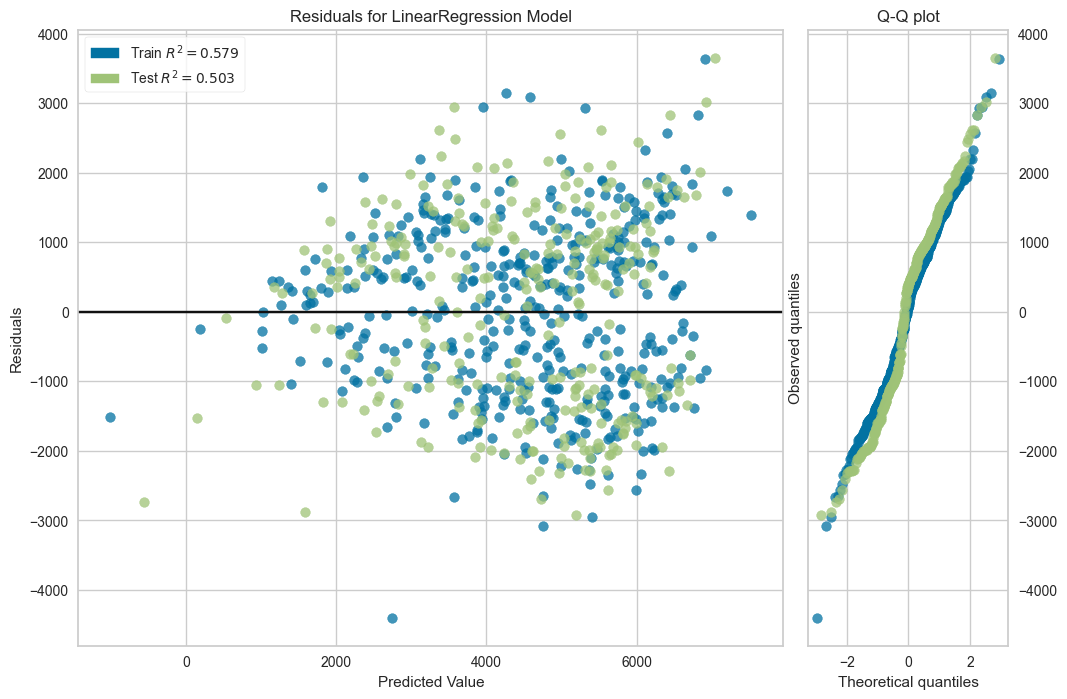

In [40]:
plt.figure(figsize=(12,8));
viz = residuals_plot(model, X_train_no_year, y_train, X_test_no_year, y_test, is_fitted=True, qqplot=True, hist=False);

In [41]:
model = LassoCV(alphas=lambdas,cv=5).fit(X_train_no_year,y_train)

lasso_r2 =  np.mean(cross_val_score(model, X_train_no_year,y_train))

print('Best lambda:', model.alpha_)
print('R2 score:', lasso_r2)

y_pred_test = model.predict(X_test_no_year)
mse = mean_squared_error(y_test, y_pred_test)

print(f"Mse tiene un valor de: {mse}")

Best lambda: 5.0
R2 score: 0.5297111002487298
Mse tiene un valor de: 1994158.745608211


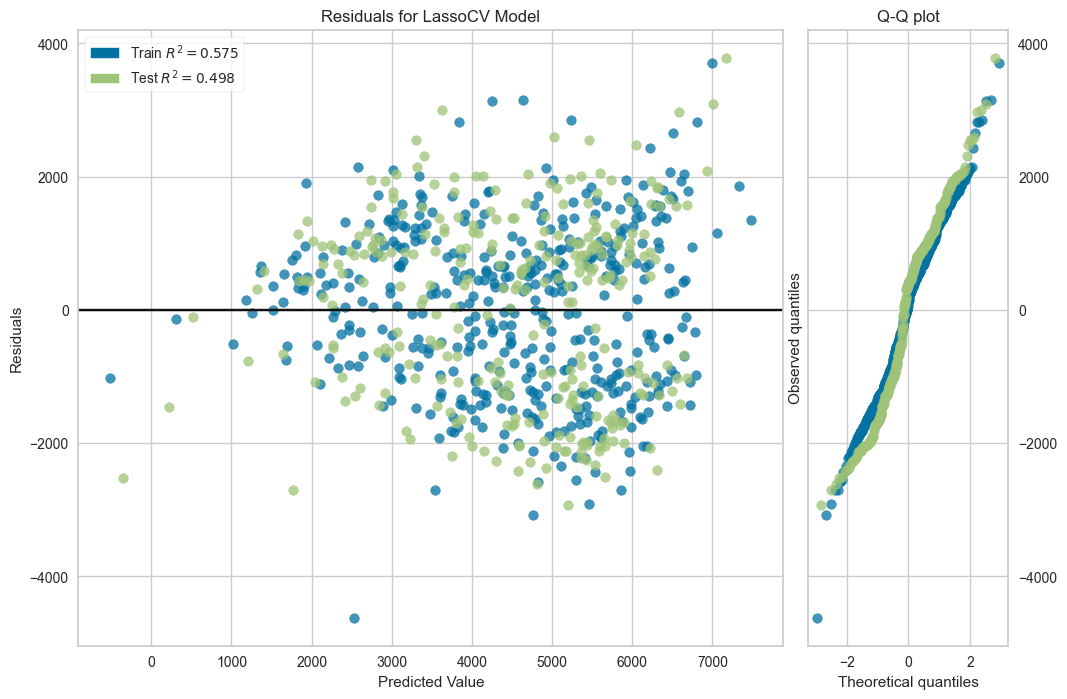

In [42]:
plt.figure(figsize=(12,8));
viz = residuals_plot(model, X_train_no_year, y_train, X_test_no_year, y_test, is_fitted=True, qqplot=True, hist=False);

Podemos ver que la variable year es importante a la hora de predecir los valores. Por lo tanto, esta variable no debería ser eliminada.
Pero hay que tener en cuenta que no tiene una gran variabilidad de valores (solo contiene valores de 0 o 1, estos se corresponden a año 2011 y 2012 respectivamente). Esto puede llegar a tener un efecto negativo en predicciones a futuro ya que no comprende a la perfección el papel de la variable year.

Por lo tanto, predecir el uso de bicicletas en el rango dado nuestro modelo si que llega a hacerlo de buena manera. Pero para hacer predicciones a futuro, optaríamos o bien por aumentar el muestreo y obtener una variabilidad de los datos o bien prescindir de esta variable.

## **Apartado F: Análisis de los resultados**

**Comparad los valores pronosticados con los valores reales de los tres modelos y sus calidades. ¿Qué modelo os parece mejor? ¿Por qué?**

Podemos observar los 3 modelos tienen un valor de r2 muy parecido (en torno al 0.8). A su vez, el MSE es similar con un valor alrededor de 800.000. Por lo tanto, no hay una diferencia notoria de calidad entre los 3 modelos de regresión. Pero siguiendo estos estadísticos de calidad, la regresión lineal simple ya que es la que llega a ofrecer un r2 mejor tanto en el conjunto de training como el de test.


**Analizad los pesos de la regresión lineal y LASSO. ¿Qué atributos son más importantes? ¿Hay atributos que no son relevantes?**

Como podemos ver en plot de los pesos en los apartados correspondientes de la Regresión Lineal y de la Regresión LASSO, hay semejanzas en los pesos de ambas regresiones.

Los atributos que da más peso positivo la LR son, en este orden: *mnth_10*, *mnth_9* y *yr*. Como el atributo que más peso negativo aporta es *weathersit_3*.

Si vemos los pesos de la LASSO, los 3 atributos con más peso positivo son los mismos, pero en este caso *yr* pasa a tener más peso que *mnth_9*. Y el atributo con más peso negativo se mantiene el mismo.

Sí que hay atributos que no son relevantes. Estudiando los plots de la LR y la LASSO, podemos ver que ambas dan un peso casi nulo a los siguientes atributos: *holiday*, *weekday_3*, *weekday_5*, *weekday_2*, *mnth_2*, *weekday_4* y *workingday_1*.

**Comparad las predicciones de la regresión de Poisson y la regresión de LASSO. ¿Hay alguna diferencia en su comportamiento? ¿Qué creéis que está pasando?**

Las 2 funcionan de manera similar con un R² bastante bueno dentro de lo que se puede considerar (cerca del 0.8). Es verdad que la LASSO funciona un poco mejor que la regresión Poisson, però a priori tampoco podemos ver una diferencia muy notable. Esto se puede deber a que la regresión de Poisson asume que la variable de respuesta tiene una distribución de Poisson, lo que significa que la media es igual a la varianza y esto no tiene porque ser así en nuestro caso.